There are many talks tomorrow at the [CSV Conf](https://csvconf.com/speakers/). I want to cluster the talks:

- Get html
- Get talk titles
- Match titles with description (to get more text)
- Model with TF-IDF
- Find clusters

### Get HTML

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
website_to_parse = "https://csvconf.com/speakers/"

# Save HTML to soup
html_data = requests.get(website_to_parse).text
soup = BeautifulSoup(html_data, "html5lib")

In [3]:
doc = soup.find_all("table", attrs={"class", "speakers"})[1]

names = doc.find_all("span", attrs={"class": "name"})
names = [t.getText().strip() for t in names]

titles = doc.find_all("p", attrs={"class": "title"})
titles = [t.getText().strip() for t in titles]

abstracts = doc.find_all("p", attrs={"class": "abstract"})
abstracts = [t.getText().strip() for t in abstracts]

In [4]:
print(len(names), len(titles), len(abstracts))

45 45 45


### Document representation

In [5]:
df = pd.DataFrame.from_dict({
    'names':names,
    'titles':titles,
    'abstracts':abstracts})

# Combine text of title and abstract
df['document'] = df['titles'] + " " + df['abstracts']

# Add index
df['index'] = df.index

Preprocess text

In [6]:
import sys
sys.path.append("/Users/csiu/repo/kick/src/python")
import sim_doc as sim_doc

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.extmath import randomized_svd

In [7]:
## Preprocess
_ = sim_doc.preprocess_data(df)

## TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['doc_processed'])

### Cluster the talks

I refer to [Jörn Hees (2015)](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/) to generate the hierarchical clustering and dendrogram using [`scipy.cluster.hierarchy.dendrogram`](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html).



In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

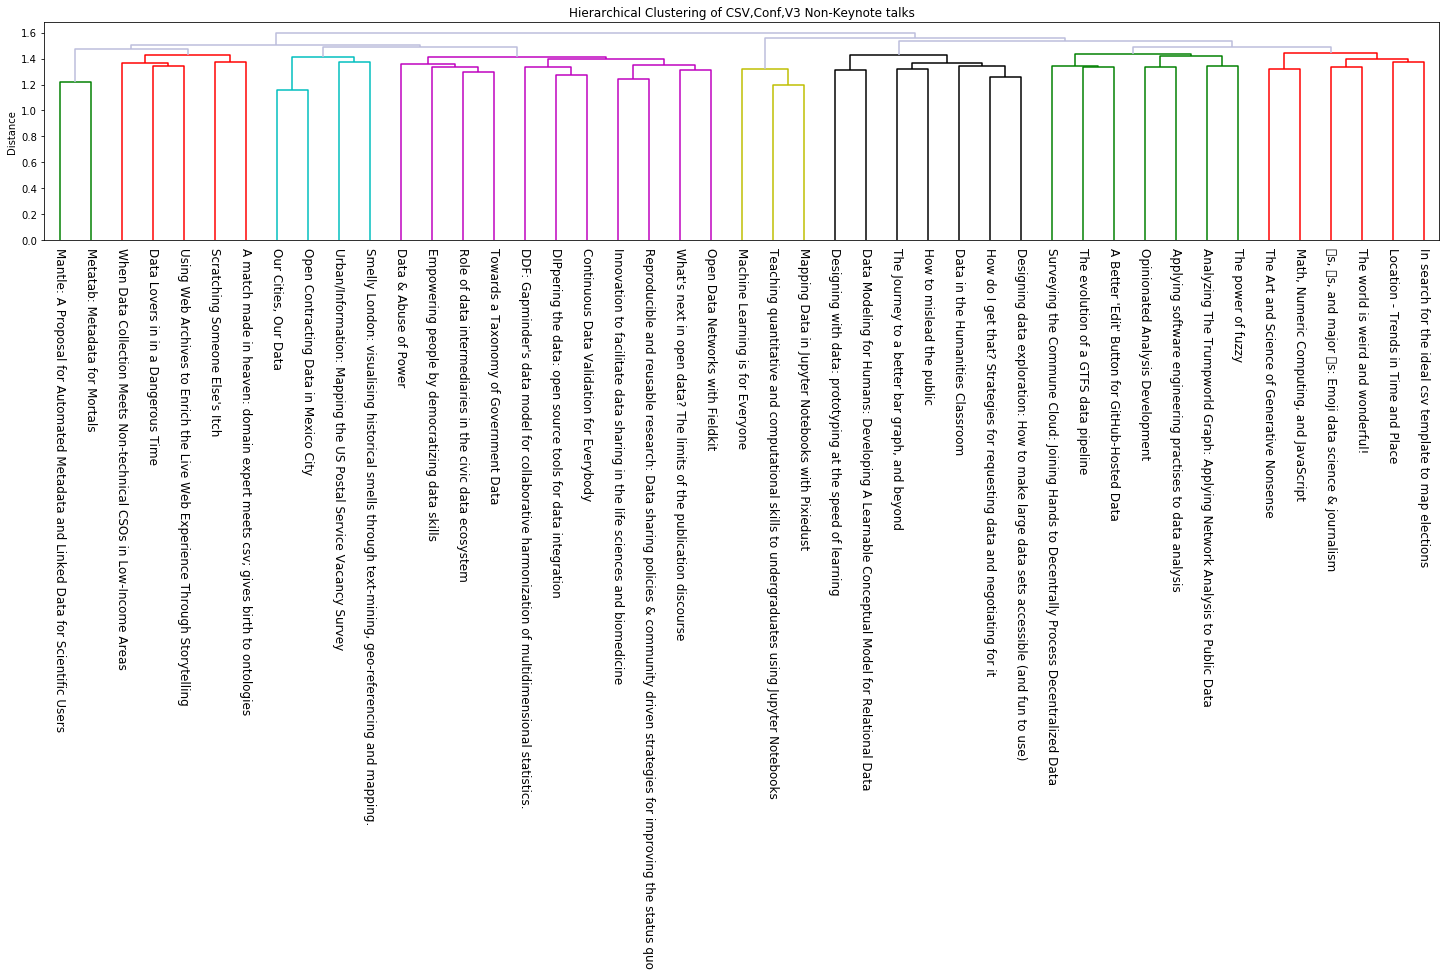

In [9]:
# generate the linkage matrix
Z = linkage(X.toarray(), 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 4))
plt.title('Hierarchical Clustering of CSV,Conf,V3 Non-Keynote talks')
plt.xlabel('')
plt.ylabel('Distance')
dn = dendrogram(
    Z,
    leaf_rotation=270,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    labels = df["titles"].tolist(),
    color_threshold=1.45, # where to cut for clusters
    above_threshold_color='#bcbddc'
)
plt.show()